In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\BARANIDHARAN SIR PROJECT\X-Ray Images Dataset for research project-20211204T084221Z-001',
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\BARANIDHARAN SIR PROJECT\X-Ray Images Dataset for research project-20211204T084221Z-001', # same directory as training data
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(331, 331, 3))

Found 5171 images belonging to 3 classes.
Found 1292 images belonging to 3 classes.


In [ ]:
from keras.applications import VGG19

VGG_19_MODEL = Sequential()

vgg19 = keras.applications.vgg19.VGG19(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(331,331,3), pooling='max', classes=3,
    classifier_activation='softmax'
)

for layer in vgg19.layers:
    layer.trainable = False 
    
VGG_19_MODEL.add(vgg19)
VGG_19_MODEL.add(Flatten())
VGG_19_MODEL.add(Dense(512,activation='relu'))
VGG_19_MODEL.add(Dense(3, activation='softmax'))

VGG_19_MODEL.summary()

sgd = SGD(learning_rate=0.001, momentum=0.9)

VGG_19_MODEL.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

graph = VGG_19_MODEL.fit(train_generator, validation_data=validation_generator, epochs=25)

graph

80142336/80134624 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 20,288,579
Trainable params: 264,195
Non-trainable params: 20,024,384
_________________________________________________________________
Epoch 1/25
162/162 [==============================] - 3782s 23s/step - loss: 1.0228 - accuracy: 0.4850 - val_loss: 0.9754 - val_accuracy: 0.5163
Epoch 2/25
162/162 [======

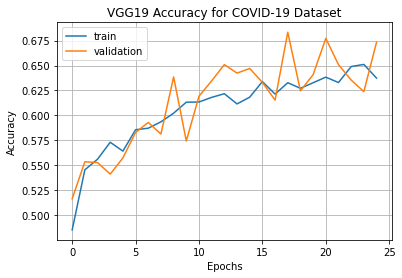

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('VGG19 Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using DenseNet121 model is',max_acc*100)

The highest accuracy achieved using DenseNet121 model is 68.34365129470825
